<a href="https://colab.research.google.com/github/Vibha16/Credit-card-fraud-detection/blob/main/Project_Credit_card_fraud_detection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

In [ ]:
#Load the dataset to a Pandas Dataframe
credit_card_data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
# Printing the first 5 rows
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Printing the last 5 rows
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# Dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Checking the number of missing values in each coloumn 
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
from pandas.core.algorithms import value_counts
# distribution of legit transactions and fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

0 represents normal transactions and 1 represents fraudulent transactions.

Here around 492 are fraudulent transactions. 

Dataset is unbalanced, we need to still process it.

In [ ]:
# separating the data for analysis 
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

All the values in Class containing 0 will be stored in 'legit' and all the values in class containing 1 will be stored in 'fraud'. 

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
# Statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

eg 50% transactions are less than 22.00 dollars.
 

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#  Compare the values for both of these transactions
# Gives the mean of all the coloumns
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


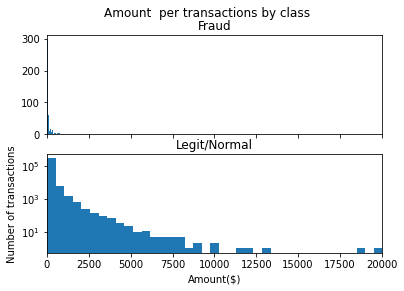

In [ ]:
f, (ax1,ax2 )= plt.subplots(2, 1, sharex=True)
f.suptitle('Amount  per transactions by class ')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title("Fraud")
ax2.hist(legit.Amount, bins = bins)
ax2.set_title("Legit/Normal")
plt.xlabel('Amount($)')
plt.ylabel('Number of transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();


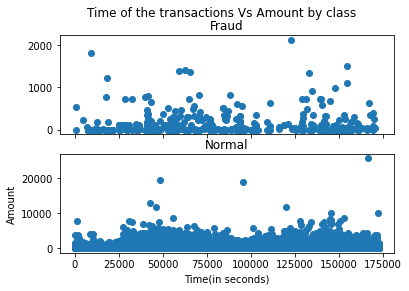

In [ ]:
# We will check do fraudulent transactions occur more often during a certain timeframe
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of the transactions Vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title("Fraud")
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Normal')
plt.xlabel('Time(in seconds)')
plt.ylabel('Amount')
plt.show()

Under sampling 

Building a sample dataset containing similar distribution of normal transaction and fraudulant transactions.

Number of fraudulant transactions -- 492

Taking random 492 samples from the normal database

In [ ]:
legit_sample = legit.sample(n = 492)

Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
26099,33907.0,-0.314876,0.920378,1.454479,1.148927,0.102956,-0.139554,0.599771,0.056953,-0.605532,...,0.215669,0.642238,-0.133757,0.072985,-0.239910,-0.178017,0.169426,0.145569,23.92,0
1092,841.0,0.182438,0.583027,1.178571,0.075090,-0.151706,0.072908,-0.120188,-0.673661,-0.482949,...,0.566010,-0.904305,0.006137,0.000838,0.700061,0.184877,0.058243,0.121357,6.99,0
122635,76633.0,1.159218,1.262748,-1.577482,1.473719,1.161285,-1.013208,0.659327,-0.152857,-0.847432,...,-0.119819,-0.205472,-0.203982,-0.282125,0.784948,-0.285054,0.058229,0.085593,2.69,0
145285,86804.0,0.100003,-0.442315,0.486691,-2.803514,0.104149,-0.751403,0.323835,-0.468796,-2.678018,...,0.178216,1.089607,-0.313023,-0.291138,-0.227089,-0.037968,-0.002196,-0.060125,15.00,0
130641,79400.0,1.226718,-0.439848,0.784821,-0.913848,-1.031448,-0.322949,-0.712360,0.159841,1.650733,...,0.012735,0.230361,-0.083391,0.015191,0.498996,-0.682220,0.086527,0.020847,1.00,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

Now we have a uniformally distributed data of normal and fraudulant transactions.

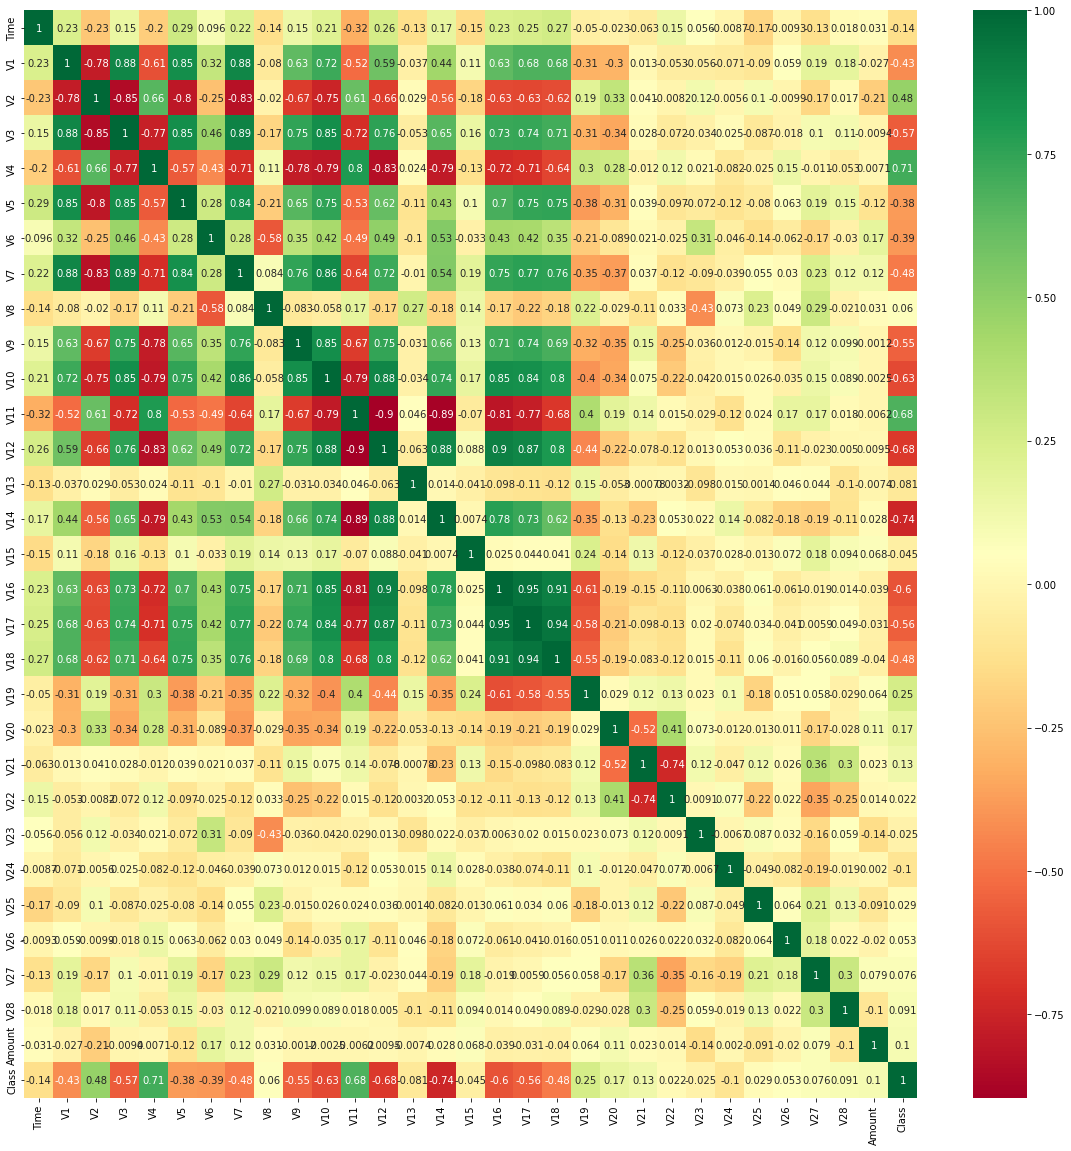

In [ ]:
# Correlation
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = credit_card_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(new_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94095.126016,-0.041975,0.072059,-0.009658,-0.045422,0.048543,-0.057705,0.068834,-0.014330,0.003338,...,0.003378,-0.022292,-0.037549,0.018239,0.011946,0.002760,0.002638,0.016030,-0.008614,78.188455
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Spliting the data into Features & Target


*   Features X
*   Target Y (0 or 1)



In [ ]:
X = new_dataset.drop(columns = 'Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
26099    33907.0 -0.314876  0.920378  1.454479  1.148927  0.102956 -0.139554   
1092       841.0  0.182438  0.583027  1.178571  0.075090 -0.151706  0.072908   
122635   76633.0  1.159218  1.262748 -1.577482  1.473719  1.161285 -1.013208   
145285   86804.0  0.100003 -0.442315  0.486691 -2.803514  0.104149 -0.751403   
130641   79400.0  1.226718 -0.439848  0.784821 -0.913848 -1.031448 -0.322949   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

26099     0
1092      0
122635    0
145285    0
130641    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split data into training data and testing data

All the features of the training data will be stored in X_train and the testing features in X_test. Similary, lables of Y_train and Y_test are stored in Testing Data 

0.2 means taking 20% of data 

random_state is for how you want to split your data.



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression - We use logistic regression for binary classification problems 

In [ ]:
model = LogisticRegression()


In [ ]:
# Training the LogisticRegression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation 

Accuracy score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on training data: ', training_data_accuracy)

Accuracy on training data:  0.9339263024142312


This means out of hundred predictions our model can predict 93 accurate predictions.

In [ ]:
# Accuracy on test data.
X_test_prediction = model.predict(X_test )
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on test data: ', test_data_accuracy)

Accuracy score on test data:  0.9086294416243654
